In [1]:
# imports
import pandas as pd
import numpy as np
from scipy import stats
from env import host, user, password
import acquire
import prepare
import mf
# imports specific to prepare
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [2]:
# use my functions to acquire telco_churn 
df = acquire.get_telco_data()

In [3]:
# let's see the value counts...
col_list = df.columns

In [4]:
col_list

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [5]:
# let's look at all columns value_counts
for col in col_list:
    print(col)
    print(df[col].value_counts())
    print('--------------------------------')

payment_type_id
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
--------------------------------
internet_service_type_id
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
--------------------------------
contract_type_id
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
--------------------------------
customer_id
8630-FJLIB    1
7860-KSUGX    1
6478-HRRCZ    1
6726-NNFWD    1
8646-JCOMS    1
             ..
8992-VONJD    1
4458-KVRBJ    1
5453-YBTWV    1
2011-TRQYE    1
0078-XZMHT    1
Name: customer_id, Length: 7043, dtype: int64
--------------------------------
gender
Male      3555
Female    3488
Name: gender, dtype: int64
--------------------------------
senior_citizen
0    5901
1    1142
Name: senior_citizen, dtype: int64
--------------------------------
partner
No     3641
Yes    3402
Name: partner, dtype: int64
--------------------------------
dependents
No     4933
Yes    2110
Name: dependents, dtype: int64

In [6]:
# let's see what we're working with...
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [7]:
df['customer_id'].nunique()

7043

In [8]:
# reset the customer_id to be the index
df = df.set_index('customer_id')

In [9]:
df.index

Index(['0016-QLJIS', '0017-DINOC', '0019-GFNTW', '0056-EPFBG', '0078-XZMHT',
       '0114-IGABW', '0123-CRBRT', '0191-EQUUH', '0214-JHPFW', '0229-LFJAF',
       ...
       '9837-FWLCH', '9860-LISIZ', '9867-NNXLC', '9929-PLVPA', '9932-WBWIK',
       '9962-BFPDU', '9967-ATRFS', '9970-QBCDA', '9975-SKRNR', '9986-BONCE'],
      dtype='object', name='customer_id', length=7043)

In [10]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,,
0016-QLJIS,2,1,3,Female,0,Yes,Yes,65,Yes,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
0017-DINOC,4,1,3,Male,0,No,No,54,No,No phone service,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
0019-GFNTW,3,1,3,Female,0,No,No,56,No,No phone service,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
0056-EPFBG,4,1,3,Male,0,Yes,Yes,20,No,No phone service,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
0078-XZMHT,3,1,3,Male,0,Yes,No,72,Yes,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [11]:
df.index.nunique()

7043

In [12]:
# are there any null values / whitespace?
# This replaces empty cells with nan (null values)
df = df.replace(' ', np.nan)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   gender                    7043 non-null   object 
 4   senior_citizen            7043 non-null   int64  
 5   partner                   7043 non-null   object 
 6   dependents                7043 non-null   object 
 7   tenure                    7043 non-null   int64  
 8   phone_service             7043 non-null   object 
 9   multiple_lines            7043 non-null   object 
 10  online_security           7043 non-null   object 
 11  online_backup             7043 non-null   object 
 12  device_protection         7043 non-null   object 
 13  tech_support              7043 non-null   object 
 14

In [14]:
# drop the nulls...
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7032 non-null   int64  
 1   internet_service_type_id  7032 non-null   int64  
 2   contract_type_id          7032 non-null   int64  
 3   gender                    7032 non-null   object 
 4   senior_citizen            7032 non-null   int64  
 5   partner                   7032 non-null   object 
 6   dependents                7032 non-null   object 
 7   tenure                    7032 non-null   int64  
 8   phone_service             7032 non-null   object 
 9   multiple_lines            7032 non-null   object 
 10  online_security           7032 non-null   object 
 11  online_backup             7032 non-null   object 
 12  device_protection         7032 non-null   object 
 13  tech_support              7032 non-null   object 
 14

In [15]:
# convert payment types to 1:auto-pay, 0:not auto-pay
df['auto_pay'] = df['payment_type_id'].replace({1:0, 2:0, 3:1, 4:1})

In [16]:
# create DSL column where 1:has DSL, 0:No DSL
df['dsl'] = df['internet_service_type_id'].replace({1:1, 2:0, 3:0})

In [17]:
# create Fiber column where 1:has Fiber service, 0:No Fiber
df['fiber'] = df['internet_service_type_id'].replace({1:0, 2:1, 3:0})

In [18]:
# create Has Internet column where 1:Has Internet 0:No internet service
df['has_internet'] = df['internet_service_type_id'].replace({1:1, 2:1, 3:0})

In [19]:
# separte contract_type_id into three columns...
# create m2m column where 1:Month-to-Month service, 2:contract
df['m2m'] = df['contract_type_id'].replace({1:1, 2:0, 3:0})

In [20]:
# create one_year column where 1:One year contract, 0:no contract, or m2m
df['one_year'] = df['contract_type_id'].replace({1:0, 2:1, 3:0})

In [21]:
# create teo_year column where 1:two year contract, 0:less than 2 year contract
df['two_year'] = df['contract_type_id'].replace({1:0, 2:0, 3:1})

In [22]:
# create has contract column where 1:has contract, 0:no contract
df['has_contract'] = df['contract_type_id'].replace({1:0, 2:1, 3:1})

In [23]:
# create column to convert gender to int 1:male, 0:female
df['is_male'] = df['gender'].replace({'Male':1, 'Female':0})

In [24]:
# create reusable dictionary for replacing 'No', 'Yes', 'No internet service', 'No phone service'
rep_dict = {
    'No': 0,
    'Yes': 1,
    'No internet service': 0,
    'No phone service': 0
}

In [25]:
# create has_partner column where 1:has partner, 0:no partner
df['has_partner'] = df['partner'].replace(rep_dict)

In [26]:
# create has_dep column where 1:has dependents, 0:no dependents
df['has_dep'] = df['dependents'].replace(rep_dict)

In [27]:
# better identify tenure in months by renaming column...
df['tenure_months'] = df['tenure']

In [28]:
# create has_phone column where 1:has phone, 0:no phone
df['has_phone'] = df['phone_service'].replace(rep_dict)

In [29]:
# create multi_phone column where 1:multiple phone lines, 0:One or fewer phone lines
df['multi_phone'] = df['multiple_lines'].replace(rep_dict)

In [30]:
# create security column where 1:has online security, 2:no security
df['has_security'] = df['online_security'].replace(rep_dict)

In [31]:
# create has_backup column where 1:has online backup, 0:no backup
df['has_backup'] = df['online_backup'].replace(rep_dict)

In [32]:
# create has_protection column where 1:has device protection, 0:no device protection
df['has_protection'] = df['device_protection'].replace(rep_dict)

In [33]:
# create has_support column where 1:has tech support, 0:no tech support
df['has_support'] = df['tech_support'].replace(rep_dict)

In [34]:
# create stream_tv column where 1:streams tv, 0:no streaming tv
df['stream_tv'] = df['streaming_tv'].replace(rep_dict)

In [35]:
# create stream_movies column where 1:streams movies, 0:no streaming movies
df['stream_movies'] = df['streaming_movies'].replace(rep_dict)

In [36]:
# create has_paperless column where 1:has paperless billing, 0:no paperless billing
df['has_paperless'] = df['paperless_billing'].replace(rep_dict)

In [37]:
# convert total_charges to float
df['total_charges'] = df['total_charges'].astype(float)

In [38]:
# create has_churn column where 1:has churn, 0:no churn
df['has_churn'] = df['churn'].replace(rep_dict)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7032 non-null   int64  
 1   internet_service_type_id  7032 non-null   int64  
 2   contract_type_id          7032 non-null   int64  
 3   gender                    7032 non-null   object 
 4   senior_citizen            7032 non-null   int64  
 5   partner                   7032 non-null   object 
 6   dependents                7032 non-null   object 
 7   tenure                    7032 non-null   int64  
 8   phone_service             7032 non-null   object 
 9   multiple_lines            7032 non-null   object 
 10  online_security           7032 non-null   object 
 11  online_backup             7032 non-null   object 
 12  device_protection         7032 non-null   object 
 13  tech_support              7032 non-null   object 
 14

In [40]:
# now I have my wide DataFrame, let's prep round 2

In [41]:
# I want to make sure I keep all columns in this df, but I want to eliminate
# some for me to work with. That way, if I need a visual check, I can look back, but
# I want have as much out of my way as possible for me to work with

In [42]:
# let's get a list of columns to drop
list(df.select_dtypes('object').columns)

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [43]:
# all object columns in a variable to drop
obj_cols = list(df.select_dtypes('object').columns)

In [44]:
# other columns to drop...
other_drops = ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'tenure']

In [45]:
# combine all drops into 1 list
all_drops = obj_cols + other_drops

In [46]:
# return a new, clean dataframe
df_1 = df.drop(columns=all_drops)

In [47]:
# what's it look like?
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   senior_citizen   7032 non-null   int64  
 1   monthly_charges  7032 non-null   float64
 2   total_charges    7032 non-null   float64
 3   auto_pay         7032 non-null   int64  
 4   dsl              7032 non-null   int64  
 5   fiber            7032 non-null   int64  
 6   has_internet     7032 non-null   int64  
 7   m2m              7032 non-null   int64  
 8   one_year         7032 non-null   int64  
 9   two_year         7032 non-null   int64  
 10  has_contract     7032 non-null   int64  
 11  is_male          7032 non-null   int64  
 12  has_partner      7032 non-null   int64  
 13  has_dep          7032 non-null   int64  
 14  tenure_months    7032 non-null   int64  
 15  has_phone        7032 non-null   int64  
 16  multi_phone      7032 non-null   int64  
 17  has_

In [48]:
df_1.nunique()

senior_citizen        2
monthly_charges    1584
total_charges      6530
auto_pay              2
dsl                   2
fiber                 2
has_internet          2
m2m                   2
one_year              2
two_year              2
has_contract          2
is_male               2
has_partner           2
has_dep               2
tenure_months        72
has_phone             2
multi_phone           2
has_security          2
has_backup            2
has_protection        2
has_support           2
stream_tv             2
stream_movies         2
has_paperless         2
has_churn             2
dtype: int64

In [49]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on has_churn.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=1221, stratify=df.has_churn)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=1221, 
                                       stratify=train_validate.has_churn)
    return train, validate, test

In [50]:
train, validate, test = split_data(df_1)

In [51]:
# what do each of my new splits look like?
train.shape, validate.shape, test.shape

((3937, 25), (1688, 25), (1407, 25))

In [52]:
# ok, I should be good to move on to exploration

In [53]:
# first, I'm going to look at my training data set
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3937 entries, 3976-HXHCE to 9606-PBKBQ
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   senior_citizen   3937 non-null   int64  
 1   monthly_charges  3937 non-null   float64
 2   total_charges    3937 non-null   float64
 3   auto_pay         3937 non-null   int64  
 4   dsl              3937 non-null   int64  
 5   fiber            3937 non-null   int64  
 6   has_internet     3937 non-null   int64  
 7   m2m              3937 non-null   int64  
 8   one_year         3937 non-null   int64  
 9   two_year         3937 non-null   int64  
 10  has_contract     3937 non-null   int64  
 11  is_male          3937 non-null   int64  
 12  has_partner      3937 non-null   int64  
 13  has_dep          3937 non-null   int64  
 14  tenure_months    3937 non-null   int64  
 15  has_phone        3937 non-null   int64  
 16  multi_phone      3937 non-null   int64  
 17  has_

In [54]:
# looking at categorical vs continuous variables
train.nunique()

senior_citizen        2
monthly_charges    1333
total_charges      3743
auto_pay              2
dsl                   2
fiber                 2
has_internet          2
m2m                   2
one_year              2
two_year              2
has_contract          2
is_male               2
has_partner           2
has_dep               2
tenure_months        72
has_phone             2
multi_phone           2
has_security          2
has_backup            2
has_protection        2
has_support           2
stream_tv             2
stream_movies         2
has_paperless         2
has_churn             2
dtype: int64

In [55]:
# what about the math
train.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,3937.0,0.169418,0.375169,0.00,0.0,0.00,0.0,1.00
monthly_charges,3937.0,64.487071,29.887050,18.25,35.5,70.15,89.7,118.35
total_charges,3937.0,2267.968606,2251.870938,18.80,397.0,1388.45,3810.8,8684.80
auto_pay,3937.0,0.433579,0.495632,0.00,0.0,0.00,1.0,1.00
dsl,3937.0,0.347473,0.476228,0.00,0.0,0.00,1.0,1.00
fiber,3937.0,0.434341,0.495733,0.00,0.0,0.00,1.0,1.00
has_internet,3937.0,0.781814,0.413067,0.00,1.0,1.00,1.0,1.00
m2m,3937.0,0.552451,0.497304,0.00,0.0,1.00,1.0,1.00
one_year,3937.0,0.211328,0.408303,0.00,0.0,0.00,0.0,1.00
two_year,3937.0,0.236220,0.424813,0.00,0.0,0.00,0.0,1.00


In [56]:
train.columns

Index(['senior_citizen', 'monthly_charges', 'total_charges', 'auto_pay', 'dsl',
       'fiber', 'has_internet', 'm2m', 'one_year', 'two_year', 'has_contract',
       'is_male', 'has_partner', 'has_dep', 'tenure_months', 'has_phone',
       'multi_phone', 'has_security', 'has_backup', 'has_protection',
       'has_support', 'stream_tv', 'stream_movies', 'has_paperless',
       'has_churn'],
      dtype='object')

In [57]:
# let's get a list of categorical variables...
cat_vars = ['senior_citizen', 'auto_pay', 'dsl', 'fiber', 'has_internet', 'm2m', 'one_year',
       'two_year', 'has_contract', 'is_male', 'has_partner', 'has_dep', 'has_phone', 'multi_phone', 'has_security',
       'has_backup', 'has_protection', 'has_support', 'stream_tv',
       'stream_movies', 'has_paperless']

In [58]:
quant_vars = ['monthly_charges', 'total_charges', 'tenure_months']

In [59]:
# can I make a function to look at chi^2 for all categorical variables against has_churn?
for cat in cat_vars:
    print(cat)
    observed = pd.crosstab(train['has_churn'], train[cat])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    print(f'chi^2 = {chi2:.4f}')
    print(f'p     = {p:.4f}')
    print('--------------------------------')

senior_citizen
chi^2 = 114.5890
p     = 0.0000
--------------------------------
auto_pay
chi^2 = 164.2553
p     = 0.0000
--------------------------------
dsl
chi^2 = 63.2535
p     = 0.0000
--------------------------------
fiber
chi^2 = 398.3547
p     = 0.0000
--------------------------------
has_internet
chi^2 = 217.2718
p     = 0.0000
--------------------------------
m2m
chi^2 = 632.7017
p     = 0.0000
--------------------------------
one_year
chi^2 = 131.1002
p     = 0.0000
--------------------------------
two_year
chi^2 = 338.5036
p     = 0.0000
--------------------------------
has_contract
chi^2 = 632.7017
p     = 0.0000
--------------------------------
is_male
chi^2 = 1.9712
p     = 0.1603
--------------------------------
has_partner
chi^2 = 68.2426
p     = 0.0000
--------------------------------
has_dep
chi^2 = 89.8354
p     = 0.0000
--------------------------------
has_phone
chi^2 = 0.0721
p     = 0.7884
--------------------------------
multi_phone
chi^2 = 5.4421
p     = 0.0197


In [60]:
# can I make a function to look at chi^2 for all categorical variables against has_churn?
def telco_cat_chi(df):
    for cat in cat_vars:
        print(cat)
        observed = pd.crosstab(train['has_churn'], train[cat])
        chi2, p, degf, expected = stats.chi2_contingency(observed)
        print(f'chi^2 = {chi2:.4f}')
        print(f'p     = {p:.4f}')
        print('--------------------------------')

In [61]:
telco_cat_chi(train)

senior_citizen
chi^2 = 114.5890
p     = 0.0000
--------------------------------
auto_pay
chi^2 = 164.2553
p     = 0.0000
--------------------------------
dsl
chi^2 = 63.2535
p     = 0.0000
--------------------------------
fiber
chi^2 = 398.3547
p     = 0.0000
--------------------------------
has_internet
chi^2 = 217.2718
p     = 0.0000
--------------------------------
m2m
chi^2 = 632.7017
p     = 0.0000
--------------------------------
one_year
chi^2 = 131.1002
p     = 0.0000
--------------------------------
two_year
chi^2 = 338.5036
p     = 0.0000
--------------------------------
has_contract
chi^2 = 632.7017
p     = 0.0000
--------------------------------
is_male
chi^2 = 1.9712
p     = 0.1603
--------------------------------
has_partner
chi^2 = 68.2426
p     = 0.0000
--------------------------------
has_dep
chi^2 = 89.8354
p     = 0.0000
--------------------------------
has_phone
chi^2 = 0.0721
p     = 0.7884
--------------------------------
multi_phone
chi^2 = 5.4421
p     = 0.0197


In [62]:
# now let's do ttests of continuous variables against has_churn
def telco_quant_ttest(df):
    for quant in quant_vars:
        churn_rate = df['has_churn'].mean()
        alpha = 0.01
        t, p = stats.ttest_1samp(df[quant], churn_rate)
        print(quant)
        print('tscore:', t.round(2))
        print('p/2:   ', p/2)
        print('alpha: ', alpha)
        print('-------------------------------------')

In [63]:
telco_quant_ttest(train)

monthly_charges
tscore: 134.83
p/2:    0.0
alpha:  0.01
-------------------------------------
total_charges
tscore: 63.19
p/2:    0.0
alpha:  0.01
-------------------------------------
tenure_months
tscore: 81.78
p/2:    0.0
alpha:  0.01
-------------------------------------


In [64]:
# let's visualize some of this

def telco_melt(df):
    '''
    This function will take in the cleaned/prepped/split telco_train and return a melted
    dataframe of all numerical/continuous variables
    '''
#     melts the data into 3 cols (has_churn, measurement, value)
# has_churn=[1,0]
# measurement=['monthly_charges', 'tenure_months']
# value = specific numerical value of each measurement
    df = df[['has_churn', 'monthly_charges', 'tenure_months']].melt(id_vars = ['has_churn'],
                         var_name = 'measurement',
                         value_name = 'value')
    return df

In [65]:
telco_quant_melt = telco_melt(train)

In [66]:
# ok, I have my melt, now can I swarmplot?

def telco_swarm(df):
    '''
    takes in my melted telco_train df and returns a swarm plot of all numerical/
    continuous variables on the x-axis, with the value on the y-axis, and
    includes a color hue to distinguish between churn vs no churn
    '''
    plt.figure(figsize=(8,6))
    p = sns.stripplot(
    x='measurement',
    y='value',
    hue='has_churn',
    data=df,
    )
    p.set(xlabel='')
    return plt.show()


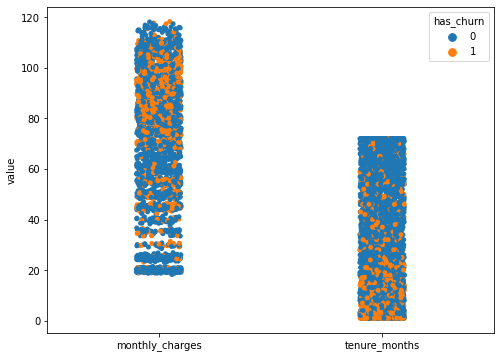

In [67]:
telco_swarm(telco_quant_melt)

<AxesSubplot:>

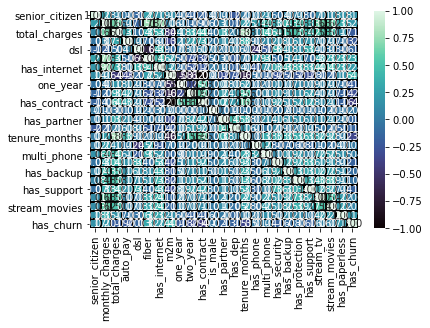

In [68]:
sns.heatmap(train.corr(), cmap='mako', center=0, linewidth= 1, linecolor= 'k', annot= True, fmt='.2f', )

In [69]:
features_1 = ['senior_citizen', 'auto_pay', 'dsl', 'fiber', 'has_internet', 'm2m', 'has_churn']

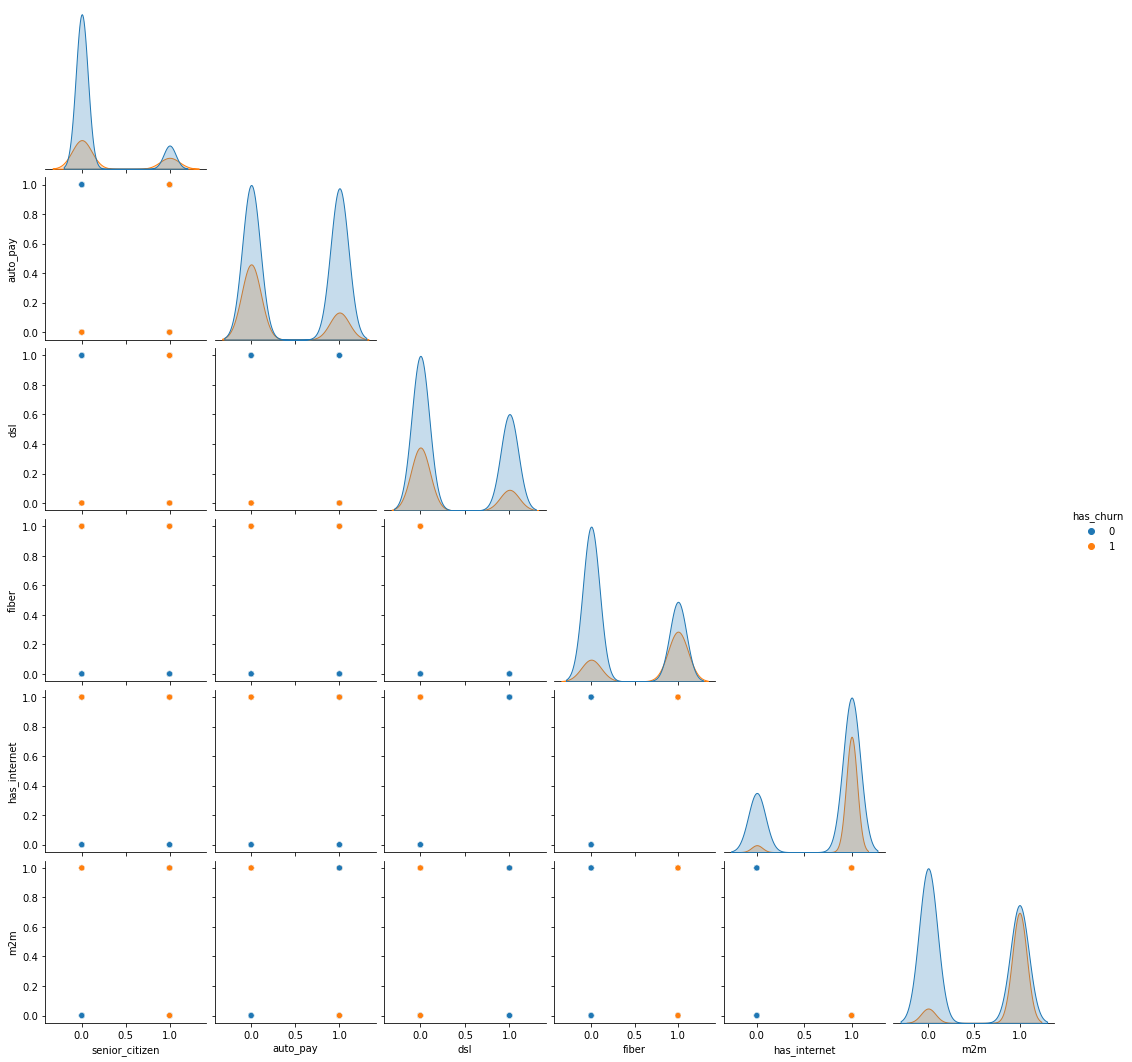

In [70]:
sns.pairplot(train[features_1], hue='has_churn', corner=True)

# Model Building

- Positive: Churn
- Negative: No Churn
- True Positive: Model predicts churn, and there actually was churn
- True Negative: Model predicts no churn, and there actually was no churn
- False Positive: Model predicts churn, when in fact there was no churn
- False Negative: Model predicts no churn, when in fact customer churned

In [71]:
# first let's get a baseline...
X_train, y_train = train.drop(columns='has_churn'), train['has_churn']
# 1. Create the object
baseline = DummyClassifier(strategy='constant', constant=0)
# 2. Fit the object
baseline.fit(X_train, y_train)
# how does it do on training data set?
print('Baseline accuracy: %.4f' % baseline.score(X_train, y_train))

Baseline accuracy: 0.7343


In [72]:
# now let's see a decision tree with all variables...
tree_1 = DecisionTreeClassifier(max_depth=3, random_state=1221)
tree_1.fit(X_train, y_train)
tree_1.score(X_train,y_train)

0.7896875793751588

In [73]:
# how about random forest...
rf_1 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=8, 
                            random_state=1221)

In [74]:
mf.model_performs(X_train, y_train, tree_1)


       Overall Accuracy:  78.97%

     True Positive Rate:  38.53%  
     True Negative Rate:  93.60%   
    False Positive Rate:  6.40%
    False Negative Rate:  61.47%

    ---------------------------------------------------
    

    Positive =  'Churn'

    Confusion Matrix:
    


,pred_no_churn,pred_churn
actual_no_churn,TN: 2706,FP: 185
actual_churn,FN: 643,TP: 403




    
    ---------------------------------------------------
    Classification Report:
    


,precision,recall,f1-score,support
no_churn,0.808002,0.936008,0.867308,2891.000000
churn,0.685374,0.385277,0.493268,1046.000000
accuracy,0.789688,0.789688,0.789688,0.789688
macro avg,0.746688,0.660643,0.680288,3937.000000
weighted avg,0.775422,0.789688,0.767931,3937.000000


In [75]:
rf_1.fit(X_train, y_train)
y_pred = rf_1.predict(X_train)
y_pred_proba = rf_1.predict_proba(X_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf_1.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.83


In [76]:
pd.Series(dict(zip(X_train.columns, rf_1.feature_importances_)))

senior_citizen     0.015657
monthly_charges    0.113918
total_charges      0.137835
auto_pay           0.018713
dsl                0.023098
fiber              0.092914
has_internet       0.039954
m2m                0.093522
one_year           0.020425
two_year           0.033257
has_contract       0.110056
is_male            0.009606
has_partner        0.008435
has_dep            0.007866
tenure_months      0.156583
has_phone          0.006890
multi_phone        0.011148
has_security       0.014502
has_backup         0.010793
has_protection     0.008267
has_support        0.015222
stream_tv          0.013728
stream_movies      0.013700
has_paperless      0.023909
dtype: float64

In [77]:
mf.model_performs(X_train, y_train, rf_1)


       Overall Accuracy:  83.39%

     True Positive Rate:  58.13%  
     True Negative Rate:  92.53%   
    False Positive Rate:  7.47%
    False Negative Rate:  41.87%

    ---------------------------------------------------
    

    Positive =  'Churn'

    Confusion Matrix:
    


,pred_no_churn,pred_churn
actual_no_churn,TN: 2675,FP: 216
actual_churn,FN: 438,TP: 608




    
    ---------------------------------------------------
    Classification Report:
    


,precision,recall,f1-score,support
no_churn,0.859300,0.925285,0.891073,2891.000000
churn,0.737864,0.581262,0.650267,1046.000000
accuracy,0.833884,0.833884,0.833884,0.833884
macro avg,0.798582,0.753274,0.770670,3937.000000
weighted avg,0.827036,0.833884,0.827094,3937.000000


In [79]:
# # how does this code help with deciding which features to use...
# features = SelectKBest(chi2, k=5).fit(X_train, y_train)
# mask = features.get_support() #list of booleans for selected features
# new_feat = [] 
# for bool, feature in zip(mask, X_train.columns):
#      if bool:
#         new_feat.append(feature)
# print(f'The best features are:{new_feat}') # The list of your 5 best features

In [80]:
# now let's see how that changes my models...
top_5 = ['monthly_charges', 'total_charges', 'm2m', 'has_contract', 'tenure_months']
X_train, y_train = train[top_5], train['has_churn']
X_validate, y_validate = validate[top_5], validate['has_churn']
tree_2 = DecisionTreeClassifier(max_depth=4)
tree_2.fit(X_train, y_train)
print(f'training score: {tree_2.score(X_train, y_train):.2%}')
print(f'validate score: {tree_2.score(X_validate, y_validate):.2%}')

training score: 78.87%
validate score: 79.09%


In [81]:
rf_2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=4,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=1221)

In [82]:
rf_2.fit(X_train, y_train)
print(f'training score: {rf_2.score(X_train, y_train):.2%}')
print(f'validate score: {rf_2.score(X_validate, y_validate):.2%}')

training score: 80.77%
validate score: 79.56%


In [83]:
# what about knn...
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
print(f'training score: {knn_1.score(X_train, y_train):.2%}')
print(f'validate score: {knn_1.score(X_validate, y_validate):.2%}')

training score: 98.86%
validate score: 71.33%


In [84]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
print(f'training score: {knn_3.score(X_train, y_train):.2%}')
print(f'validate score: {knn_3.score(X_validate, y_validate):.2%}')

training score: 85.73%
validate score: 74.29%


In [85]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
print(f'training score: {knn_5.score(X_train, y_train):.2%}')
print(f'validate score: {knn_5.score(X_validate, y_validate):.2%}')

training score: 82.65%
validate score: 76.90%


In [86]:
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train)
print(f'training score: {knn_10.score(X_train, y_train):.2%}')
print(f'validate score: {knn_10.score(X_validate, y_validate):.2%}')

training score: 80.11%
validate score: 78.73%


In [87]:
top_3 = ['monthly_charges', 'total_charges', 'm2m']
X_train, y_train = train[top_3], train['has_churn']
X_validate, y_validate = validate[top_3], validate['has_churn']
tree_3 = DecisionTreeClassifier(max_depth=3)
tree_3.fit(X_train, y_train)
print(f'training score: {tree_3.score(X_train, y_train):.2%}')
print(f'validate score: {tree_3.score(X_validate, y_validate):.2%}')

training score: 78.41%
validate score: 79.27%


In [98]:
last_group = ['m2m', 'fiber', 'total_charges']
X_train, y_train = train[last_group], train['has_churn']
X_validate, y_validate = validate[last_group], validate['has_churn']
tree_4 = DecisionTreeClassifier(max_depth=4, random_state=1221)
tree_4.fit(X_train, y_train)
print(f'training score: {tree_4.score(X_train, y_train):.2%}')
print(f'validate score: {tree_4.score(X_validate, y_validate):.2%}')

training score: 79.02%
validate score: 79.56%


In [99]:
rf_3 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=1221)

In [100]:
rf_3.fit(X_train, y_train)
print(f'training score: {rf_3.score(X_train, y_train):.2%}')
print(f'validate score: {rf_3.score(X_validate, y_validate):.2%}')

training score: 80.42%
validate score: 79.21%


In [101]:
mf.compare(rf_3, tree_4, X_train, y_train)


    ******       Model 1  ******                                ******     Model 2  ****** 
       Overall Accuracy:  80.42%              |                Overall Accuracy:  79.02%  
                                                
     True Positive Rate:  48.47%              |          The True Positive Rate:  38.72%  
    False Positive Rate:  8.02%              |         The False Positive Rate:  6.40% 
     True Negative Rate:  91.98%              |          The True Negative Rate:  93.60% 
    False Negative Rate:  51.53%              |         The False Negative Rate:  61.28%

    _____________________________________________________________________________________________________________
    

    Positive =  'Churn'

    Confusion Matrix
    


,pred_no_churn,pred_churn
actual_no_churn,TN: 2659,FP: 232
actual_churn,FN: 539,TP: 507
,pred_no_churn,pred_churn
actual_no_churn,TN: 2706,FP: 185
actual_churn,FN: 641,TP: 405




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
no_churn,0.831457,0.919751,0.873378,2891.000000
churn,0.686062,0.484704,0.568067,1046.000000
accuracy,0.804166,0.804166,0.804166,0.804166
macro avg,0.758760,0.702227,0.720723,3937.000000
weighted avg,0.792828,0.804166,0.792262,3937.000000
,precision,recall,f1-score,support
no_churn,0.808485,0.936008,0.867586,2891.000000
churn,0.686441,0.387189,0.495110,1046.000000
accuracy,0.790196,0.790196,0.790196,0.790196
macro avg,0.747463,0.661599,0.681348,3937.000000


In [104]:
X_train, y_train = train.drop(columns='has_churn'), train['has_churn']
X_validate, y_validate = validate.drop(columns='has_churn'), validate['has_churn']
X_test, y_test = test.drop(columns='has_churn'), test['has_churn']

In [105]:
for k in range(12, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_validate, y_validate)
    print(f'{k:2d}: {accuracy:.2%}')

12: 79.03%
13: 79.03%
14: 78.38%
15: 79.03%
16: 78.50%
17: 78.85%
18: 78.79%
19: 78.97%


In [106]:
for k in range(1, 6):
    tree = DecisionTreeClassifier(max_depth=k, random_state=1221)
    tree.fit(X_train, y_train)
    accuracy = tree.score(X_validate, y_validate)
    print(f'{k:2d}: {accuracy:.2%}')

 1: 73.40%
 2: 76.95%
 3: 79.50%
 4: 79.15%
 5: 78.32%


In [108]:
tree_3 = DecisionTreeClassifier(max_depth=3, random_state=1221)
tree_3.fit(X_train, y_train)
print(tree_3.score(X_validate, y_validate))


0.7950236966824644


In [109]:
pd.Series(dict(zip(X_train.columns, tree_3.feature_importances_)))

senior_citizen     0.000000
monthly_charges    0.027885
total_charges      0.107315
auto_pay           0.000000
dsl                0.000000
fiber              0.188041
has_internet       0.000000
m2m                0.000000
one_year           0.000000
two_year           0.003904
has_contract       0.597435
is_male            0.000000
has_partner        0.000000
has_dep            0.000000
tenure_months      0.075421
has_phone          0.000000
multi_phone        0.000000
has_security       0.000000
has_backup         0.000000
has_protection     0.000000
has_support        0.000000
stream_tv          0.000000
stream_movies      0.000000
has_paperless      0.000000
dtype: float64

In [110]:
last_4 = ['has_contract', 'fiber', 'total_charges', 'monthly_charges']

In [111]:
X_train, y_train = train[last_4], train['has_churn']
X_validate, y_validate = validate[last_4], validate['has_churn']
X_test, y_test = test[last_4], test['has_churn']

In [124]:
tree_5 = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=1221)
tree_5.fit(X_train, y_train)
print(tree_5.score(X_validate, y_validate))

0.7950236966824644


In [128]:
tree_6 = DecisionTreeClassifier(max_depth=4, random_state=1221)
tree_6.fit(X_train, y_train)
print(tree_6.score(X_validate, y_validate))

0.7861374407582938


In [130]:
mf.compare(tree_5, tree_6, X_train, y_train)


    ******       Model 1  ******                                ******     Model 2  ****** 
       Overall Accuracy:  78.97%              |                Overall Accuracy:  79.15%  
                                                
     True Positive Rate:  38.53%              |          The True Positive Rate:  54.11%  
    False Positive Rate:  6.40%              |         The False Positive Rate:  11.80% 
     True Negative Rate:  93.60%              |          The True Negative Rate:  88.20% 
    False Negative Rate:  61.47%              |         The False Negative Rate:  45.89%

    _____________________________________________________________________________________________________________
    

    Positive =  'Churn'

    Confusion Matrix
    


,pred_no_churn,pred_churn
actual_no_churn,TN: 2706,FP: 185
actual_churn,FN: 643,TP: 403
,pred_no_churn,pred_churn
actual_no_churn,TN: 2550,FP: 341
actual_churn,FN: 480,TP: 566




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
no_churn,0.808002,0.936008,0.867308,2891.000000
churn,0.685374,0.385277,0.493268,1046.000000
accuracy,0.789688,0.789688,0.789688,0.789688
macro avg,0.746688,0.660643,0.680288,3937.000000
weighted avg,0.775422,0.789688,0.767931,3937.000000
,precision,recall,f1-score,support
no_churn,0.841584,0.882048,0.861341,2891.000000
churn,0.624035,0.541109,0.579621,1046.000000
accuracy,0.791466,0.791466,0.791466,0.791466
macro avg,0.732810,0.711578,0.720481,3937.000000


In [132]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   senior_citizen   7032 non-null   int64  
 1   monthly_charges  7032 non-null   float64
 2   total_charges    7032 non-null   float64
 3   auto_pay         7032 non-null   int64  
 4   dsl              7032 non-null   int64  
 5   fiber            7032 non-null   int64  
 6   has_internet     7032 non-null   int64  
 7   m2m              7032 non-null   int64  
 8   one_year         7032 non-null   int64  
 9   two_year         7032 non-null   int64  
 10  has_contract     7032 non-null   int64  
 11  is_male          7032 non-null   int64  
 12  has_partner      7032 non-null   int64  
 13  has_dep          7032 non-null   int64  
 14  tenure_months    7032 non-null   int64  
 15  has_phone        7032 non-null   int64  
 16  multi_phone      7032 non-null   int64  
 17  has_

In [138]:
df_3 = df_1[df_1['has_churn']==0]

In [139]:
df_3[['m2m', 'total_charges']].describe()

,m2m,total_charges
count,5163.000000,5163.000000
mean,0.429983,2555.344141
std,0.495121,2329.456984
min,0.000000,18.800000
25%,0.000000,577.825000
50%,0.000000,1683.600000
75%,1.000000,4264.125000
max,1.000000,8672.450000
